In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.graph_objects as go

In [40]:
# Read the ski resort dataset (with ISO encoding for possible special characters)
ski_resort_df = pd.read_csv('skiResort.csv', encoding='ISO-8859-1')

def clean_ski_resort_data(df):
    # Step 1: Strip extra spaces in column names to ensure consistency
    df.columns = df.columns.str.strip()
    
    # Step 2: Keep only the relevant columns by name (State/Province, Altitude, Easy, Intermediate, Difficult)
    relevant_columns = ['State/Province', 'Altitude', 'Easy', 'Intermediate', 'Difficult']
    df = df[relevant_columns]
    
    # Step 3: Drop rows where any of the columns have NaN values
    df.dropna(inplace=True)  # This drops any rows with NaN values in any column
    
    # Step 4: Ensure correct data types for numerical columns using .loc
    df['Altitude'] = df['Altitude'].astype(float)
    df['Easy'] = df['Easy'].astype(float)
    df['Intermediate'] = df['Intermediate'].astype(float)
    df['Difficult'] = df['Difficult'].astype(float)

    return df


# Apply the cleaning function to the dataset
cleaned_ski_resort_df = clean_ski_resort_data(ski_resort_df)

# Load the precipitation data
precip_state_df = pd.read_csv('precip_state.csv')

# Clean precipitation data (remove rows with NaN in key columns)
precip_state_df.dropna(subset=['STATE', 'JAN'], inplace=True)  # Ensure 'STATE' and 'JAN' (January) are not NaN
precip_state_df['JAN'] = precip_state_df['JAN'].astype(float) 

# Clean snowfall data
snow_state_df = pd.read_csv('snow_state.csv')

def clean_snowfall_data(df):
    # Step 1: Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    
    # Step 2: Ensure columns are strings and remove 'cm' unit, then convert to numeric
    df['24 hr New Snow'] = df['24 hr New Snow'].astype(str).str.replace(' cm', '').astype(float)
    df['Season Snowfall Total'] = df['Season Snowfall Total'].astype(str).str.replace(' cm', '').astype(float)
    df['Base Depth'] = df['Base Depth'].astype(str).str.replace(' cm', '').astype(float)
    
    # Step 3: Drop rows with missing critical data (e.g., if 'Date' or 'Season Snowfall Total' is NaN)
    df.dropna(subset=['Date', 'Season Snowfall Total'], inplace=True)
    
    return df

# Load the individual resort snowfall data
jackson_hole_df = pd.read_csv('Jackson Hole - Wyoming.csv')
snowbird_df = pd.read_csv('Snowbird - Utah.csv')
telluride_df = pd.read_csv('Telluride - Colorado.csv')

# Clean the individual resort snowfall data using the defined function
jackson_hole_df = clean_snowfall_data(jackson_hole_df)
snowbird_df = clean_snowfall_data(snowbird_df)
telluride_df = clean_snowfall_data(telluride_df)

/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_70493/3670368184.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_70493/3670368184.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_70493/3670368184.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

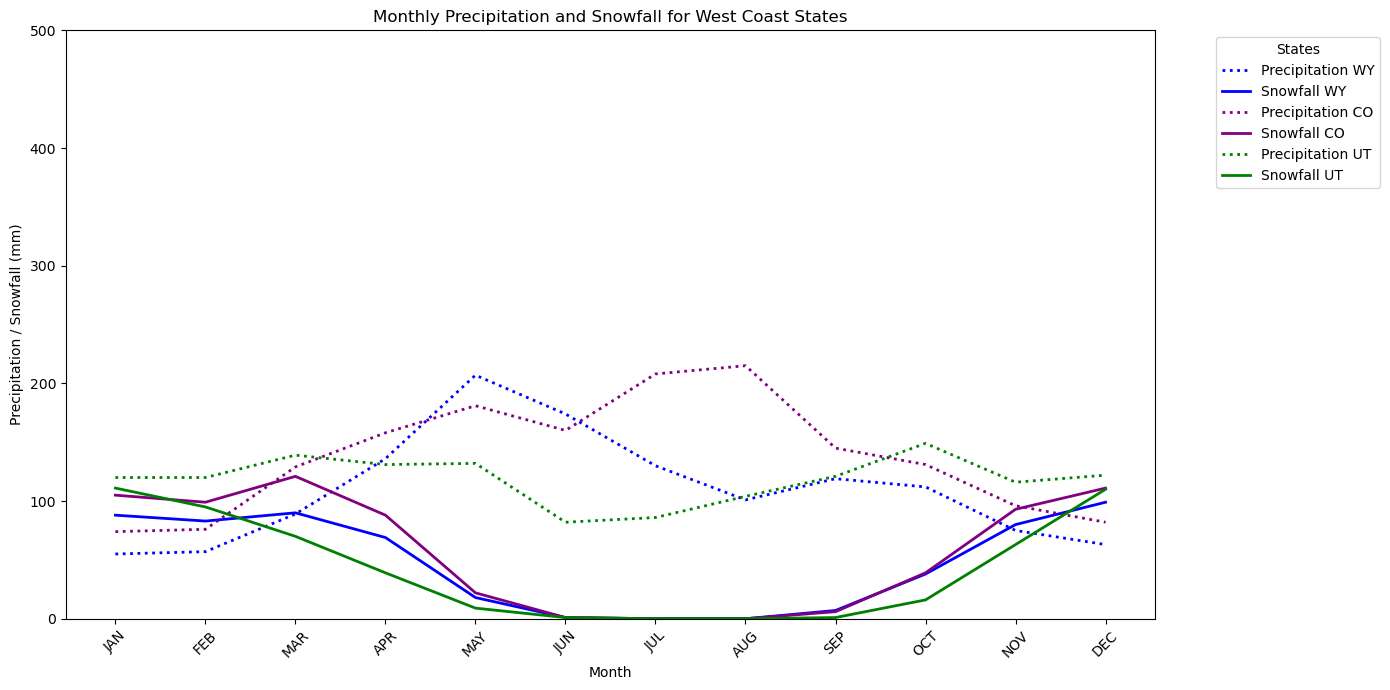

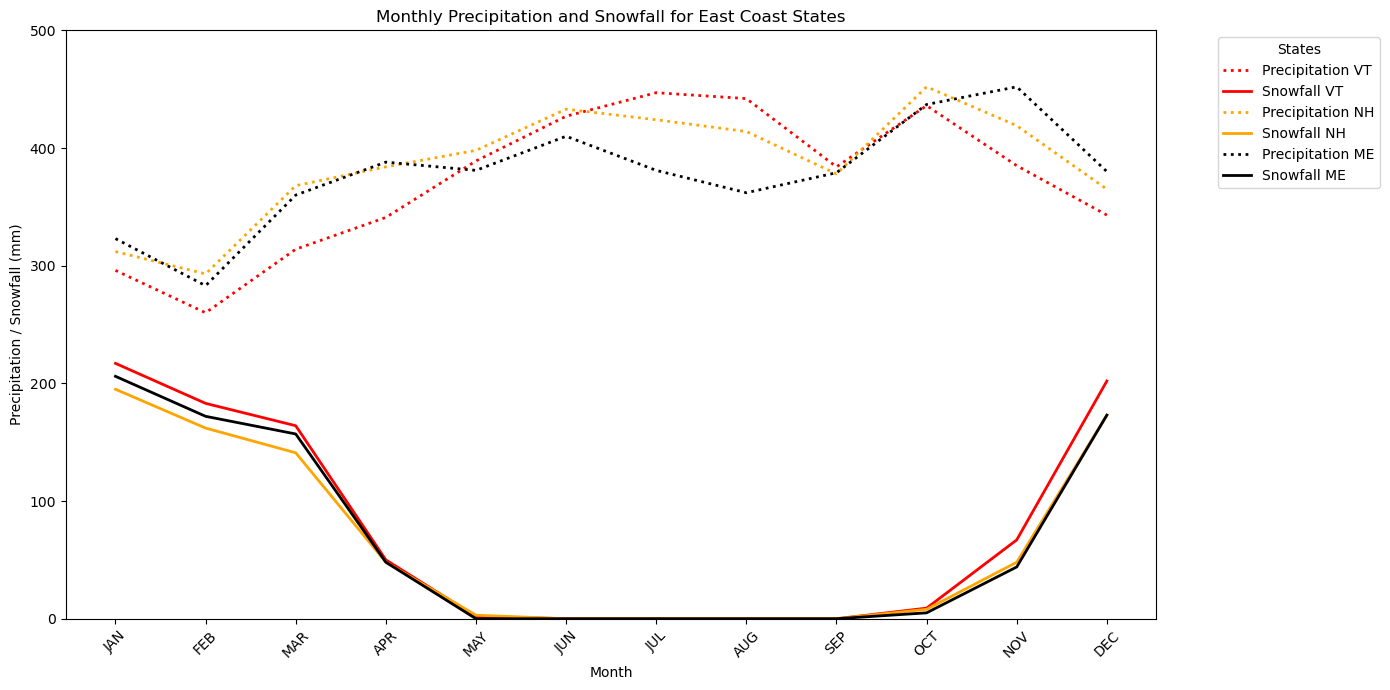

In [41]:
# Merge precipitation and snowfall data
combined_precip_snow_df = pd.merge(precip_state_df, snow_state_df, on='STATE', suffixes=('_precip', '_snow'))

# Define the correct month order
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Redefine state_colors mapping
state_colors = {
    'WY': 'blue', 'CO': 'purple', 'UT': 'green',
    'VT': 'red', 'NH': 'orange', 'ME': 'black'
}

# Define West Coast and East Coast states
west_coast_states = ['WY', 'CO', 'UT']
east_coast_states = ['VT', 'NH', 'ME']

# Assuming combined_precip_snow_df is already available with the necessary data

# Plotting for West Coast States
plt.figure(figsize=(14, 7))
for state in west_coast_states:
    state_data = combined_precip_snow_df[combined_precip_snow_df['STATE'] == state]
    plt.plot(months, state_data.iloc[0, 1:13], label=f'Precipitation {state}', linestyle=':', color=state_colors[state], linewidth=2)
    plt.plot(months, state_data.iloc[0, 13:], label=f'Snowfall {state}', linestyle='-', color=state_colors[state], linewidth=2)

plt.xlabel('Month')
plt.ylabel('Precipitation / Snowfall (mm)')
plt.title('Monthly Precipitation and Snowfall for West Coast States')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 500)
plt.tight_layout()
plt.savefig("westmonthly_precipitation.png", dpi=300, format="png")
plt.show()

# Plotting for East Coast States
plt.figure(figsize=(14, 7))
for state in east_coast_states:
    state_data = combined_precip_snow_df[combined_precip_snow_df['STATE'] == state]
    plt.plot(months, state_data.iloc[0, 1:13], label=f'Precipitation {state}', linestyle=':', color=state_colors[state], linewidth=2)
    plt.plot(months, state_data.iloc[0, 13:], label=f'Snowfall {state}', linestyle='-', color=state_colors[state], linewidth=2)

plt.xlabel('Month')
plt.ylabel('Precipitation / Snowfall (mm)')
plt.title('Monthly Precipitation and Snowfall for East Coast States')
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 500)
plt.tight_layout()
# Save the plot as a PNG file
plt.savefig("eastmonthly_precipitation.png", dpi=300, format="png")
plt.show()

/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_70493/3514309854.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_70493/3514309854.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




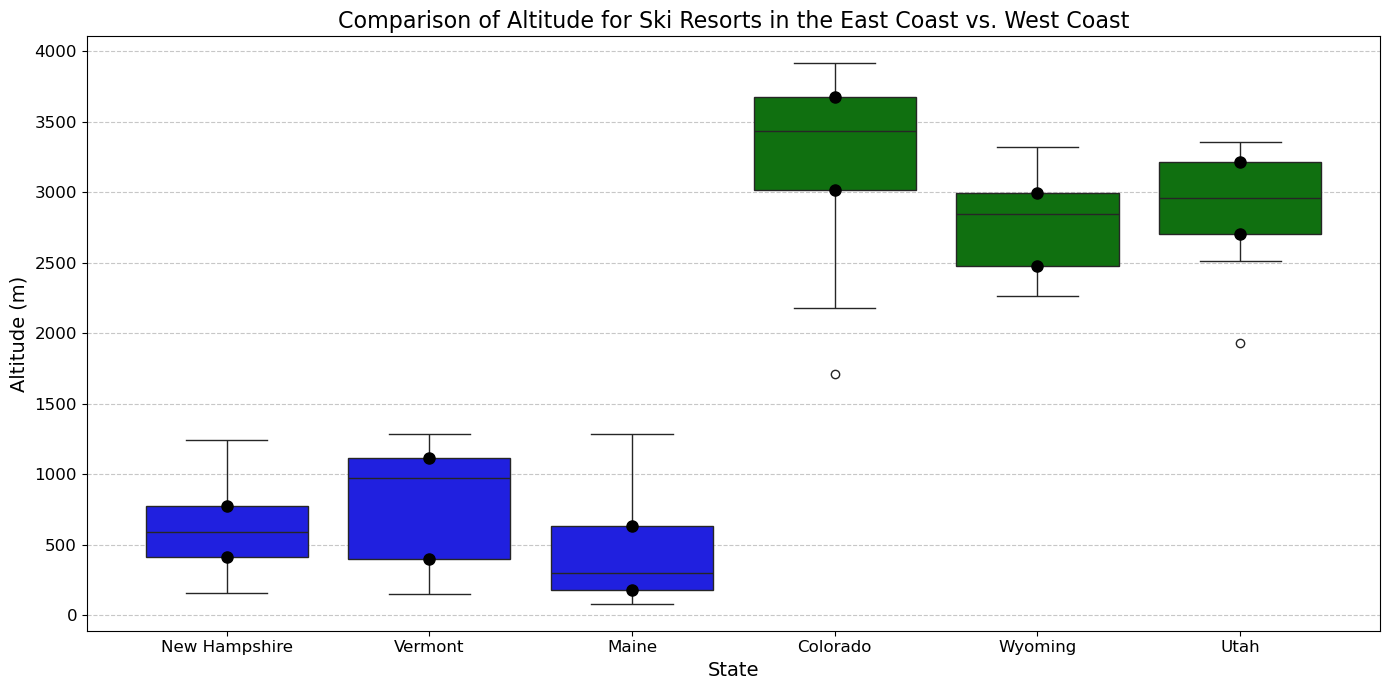

In [42]:
# Assuming the data is already loaded and cleaned
# Filter the dataset for the states of interest
states_of_interest = ['Colorado', 'Wyoming', 'Utah', 'Maine', 'New Hampshire', 'Vermont']
filtered_df = cleaned_ski_resort_df[cleaned_ski_resort_df['State/Province'].isin(states_of_interest)]

# Manually reorder the 'State/Province' column to group East Coast states first, then West Coast states
ordered_states = ['New Hampshire', 'Vermont', 'Maine', 'Colorado', 'Wyoming', 'Utah']
filtered_df['State/Province'] = pd.Categorical(filtered_df['State/Province'], categories=ordered_states, ordered=True)

# Create the boxplot comparing altitudes across these states
plt.figure(figsize=(14, 7))

# Plot the boxplot with customized colors for each coast
sns.boxplot(x='State/Province', y='Altitude', data=filtered_df, 
            palette={'New Hampshire': 'blue', 'Vermont': 'blue', 'Maine': 'blue', 
                     'Colorado': 'green', 'Wyoming': 'green', 'Utah': 'green'})

# Add dots for the 25th and 75th percentiles
for state in states_of_interest:
    state_data = filtered_df[filtered_df['State/Province'] == state]['Altitude']
    
    # Calculate the 25th and 75th percentiles
    Q1 = state_data.quantile(0.25)  # 25th percentile
    Q3 = state_data.quantile(0.75)  # 75th percentile

    # Plot black dots for the percentiles
    plt.plot(ordered_states.index(state), Q1, marker='o', markersize=8, color='black')
    plt.plot(ordered_states.index(state), Q3, marker='o', markersize=8, color='black')

# Adding labels and title
plt.title('Comparison of Altitude for Ski Resorts in the East Coast vs. West Coast', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Altitude (m)', fontsize=14)
plt.xticks(ticks=range(len(ordered_states)), labels=ordered_states, fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("altitude_boxplot.png", dpi=300, format="png")


# Show the plot
plt.show()


In [43]:
# Add a 'Resort' column to each dataset
jackson_hole_df['Resort'] = 'Jackson Hole'
snowbird_df['Resort'] = 'Snowbird'
telluride_df['Resort'] = 'Telluride'

# Combine the datasets
combined_df = pd.concat([jackson_hole_df, snowbird_df, telluride_df])
combined_df

,Date,24 hr New Snow,Season Snowfall Total,Base Depth,Resort
0,2017-01-02,8.0,8.0,74.0,Jackson Hole
1,2017-01-04,8.0,16.0,71.0,Jackson Hole
2,2017-01-05,8.0,24.0,76.0,Jackson Hole
3,2017-01-08,10.0,34.0,81.0,Jackson Hole
4,2017-01-10,20.0,54.0,79.0,Jackson Hole
...,...,...,...,...,...
401,2009-12-14,23.0,503.0,107.0,Telluride
402,2009-12-23,5.0,508.0,84.0,Telluride
403,2009-12-24,5.0,513.0,86.0,Telluride
404,2009-12-30,20.0,533.0,102.0,Telluride


In [44]:
# Define the snowfall ranges
snowfall_ranges = ['0-5 cm', '5-10 cm', '10-15 cm', '15-20 cm', '>20 cm']

# Create an empty list for the snowfall groupings
snowfall_groups = []

# Loop through the dataset and categorize the snowfall based on the defined ranges
for snow in combined_df["24 hr New Snow"]:
    if snow <= 5:
        snowfall_groups.append('0-5 cm')
    elif snow <= 10:
        snowfall_groups.append('5-10 cm')
    elif snow <= 15:
        snowfall_groups.append('10-15 cm')
    elif snow <= 20:
        snowfall_groups.append('15-20 cm')
    else:
        snowfall_groups.append('>20 cm')

# Add the list as a new column in the dataframe
combined_df["snowfall_group"] = snowfall_groups

# Group by snowfall_group and resort and count occurrences
counts_df = combined_df.groupby(["Resort","snowfall_group"]).size().reset_index(name="count")
counts_df

,Resort,snowfall_group,count
0,Jackson Hole,0-5 cm,231
1,Jackson Hole,10-15 cm,117
2,Jackson Hole,15-20 cm,67
3,Jackson Hole,5-10 cm,145
4,Jackson Hole,>20 cm,133
5,Snowbird,0-5 cm,185
6,Snowbird,10-15 cm,88
7,Snowbird,15-20 cm,51
8,Snowbird,5-10 cm,104
9,Snowbird,>20 cm,158


In [45]:
import plotly.graph_objects as go

# Prepare the labels for the Sankey diagram (resorts and snowfall groups)
labels = list(counts_df["Resort"].unique()) + list(counts_df["snowfall_group"].unique())
label_to_index = {label: i for i, label in enumerate(labels)}

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=counts_df["Resort"].map(label_to_index),  # Resorts on the left
        target=counts_df["snowfall_group"].map(label_to_index),  # Snowfall groups on the right
        value=counts_df["count"]
    )
)])

# Update the layout and show the diagram
fig.update_layout(title_text="The Relationship Between West Coast Resorts and 24Hour Snowfall Range")
fig.show()

counts_df.to_csv("sankey_data.csv", index=False)

In [46]:
# Load the dataset
slopes_data = pd.read_csv('ski_resort_stats.csv')

# Define East Coast and West Coast states based on your request
east_coast_states = ['Vermont', 'New Hampshire', 'Maine']
west_coast_states = ['Wyoming', 'Utah', 'Colorado']

# Split the data into East Coast and West Coast based on the "State" column
east_coast_df = slopes_data[slopes_data['state'].isin(east_coast_states)]
west_coast_df = slopes_data[slopes_data['state'].isin(west_coast_states)]

# Sum the percentages for each slope type (but we will normalize them)
east_coast_slopes = east_coast_df[['green_percent', 'blue_percent', 'black_percent']].sum()
west_coast_slopes = west_coast_df[['green_percent', 'blue_percent', 'black_percent']].sum()

# Normalize the percentages to sum to 100%
east_coast_total = east_coast_slopes.sum()
west_coast_total = west_coast_slopes.sum()

# Normalize each slope type
east_coast_slopes_normalized = (east_coast_slopes / east_coast_total) * 100
west_coast_slopes_normalized = (west_coast_slopes / west_coast_total) * 100

# Combine into a dataframe for plotting
slopes_comparison = pd.DataFrame({
    'East Coast': east_coast_slopes_normalized,
    'West Coast': west_coast_slopes_normalized
}).reset_index()

slopes_comparison.columns = ['Slope Type', 'East Coast', 'West Coast']

# Convert the data to long format for Altair plotting
slopes_comparison_long = slopes_comparison.melt(id_vars=["Slope Type"], value_vars=["East Coast", "West Coast"],
                                                var_name="Region", value_name="Percentage")

# Create a Pie Chart for East Coast
east_coast_pie = alt.Chart(slopes_comparison_long[slopes_comparison_long['Region'] == 'East Coast']).mark_arc().encode(
    theta='Percentage:Q',
    color='Slope Type:N',
    tooltip=['Slope Type:N', 'Percentage:Q']
).properties(
    title="East Coast Slope Type Distribution",
    width=300,
    height=300
)

# Create a Pie Chart for West Coast
west_coast_pie = alt.Chart(slopes_comparison_long[slopes_comparison_long['Region'] == 'West Coast']).mark_arc().encode(
    theta='Percentage:Q',
    color='Slope Type:N',
    tooltip=['Slope Type:N', 'Percentage:Q']
).properties(
    title="West Coast Slope Type Distribution",
    width=300,
    height=300
)

# Display the Pie Charts side by side
east_coast_pie | west_coast_pie

alt.HConcatChart(...)

In [47]:
slopes_comparison_long.to_csv("slopes_comparison_long.csv", index=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from ipywidgets import interact, fixed
from IPython.display import display, clear_output
import os
import glob
import warnings

# Suppress date parsing warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

# Load main datasets with error handling
def safe_read_csv(file_path, required=False):
    """Safely read a CSV file with proper error handling"""
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        if required:
            print(f"Required file not found: {file_path}")
            print(f"Please ensure {file_path} is in your working directory.")
            return None
        else:
            print(f"Optional file not found: {file_path}")
            return pd.DataFrame()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return pd.DataFrame()

# Load required datasets
ski_resort_stats = safe_read_csv("ski_resort_stats.csv", required=True)
if ski_resort_stats is None:
    print("Cannot proceed without ski_resort_stats.csv")
    
# Load optional datasets with fallbacks
snow_state = safe_read_csv("snow_state.csv")
slopes_comparison = safe_read_csv("slopes_comparison_long.csv")

# If slopes_comparison is missing, create a simple version
if slopes_comparison.empty:
    print("Creating synthetic slope comparison data")
    slopes_comparison = pd.DataFrame({
        'Slope Type': ['Green Slopes', 'Green Slopes', 'Blue Slopes', 'Blue Slopes', 'Black Slopes', 'Black Slopes'],
        'Region': ['East Coast', 'West Coast', 'East Coast', 'West Coast', 'East Coast', 'West Coast'],
        'Percentage': [26.1, 22.3, 44.5, 38.2, 29.4, 39.5]
    })

# Look for resort data files - handle different filename patterns
def load_resort_data():
    """Find and load resort-specific data files"""
    resort_files = {}
    
    # Resorts to look for in filenames
    resort_keywords = ['Jackson', 'Snowbird', 'Telluride', 'Whistler']
    
    try:
        # Get all CSV files in current directory
        csv_files = glob.glob("*.csv")
        
        # Filter files that might contain resort data
        potential_resort_files = []
        for f in csv_files:
            if any(resort in f for resort in resort_keywords):
                potential_resort_files.append(f)
        
        print(f"Found {len(potential_resort_files)} resort-specific files")
        
        # Try to load each file
        for file_path in potential_resort_files:
            try:
                df = pd.read_csv(file_path)
                
                # Check if it has the expected columns for resort data
                expected_cols = ['Date', '24 hr New Snow', 'Season Snowfall Total', 'Base Depth']
                if all(col in df.columns for col in expected_cols):
                    resort_files[file_path] = df
                    print(f"Successfully loaded {file_path}")
                else:
                    print(f"File {file_path} doesn't have the expected columns")
            except Exception as e:
                print(f"Couldn't load {file_path}: {e}")
                
        return resort_files
                
    except Exception as e:
        print(f"Error searching for resort files: {e}")
        return {}

# Load available resort data
resort_files = load_resort_data()

# Process resort data to extract snow measurements
def process_resort_data(resort_files):
    """Process each resort data file to extract and clean snow measurements"""
    processed_data = {}
    
    # Extract snowfall measurements from string to float
    def extract_snowfall(snowfall_str):
        """Extract numerical value from string like '8 cm'"""
        if pd.isna(snowfall_str) or snowfall_str == '':
            return 0
        try:
            # Get first word and convert to float
            return float(str(snowfall_str).split()[0])
        except:
            return 0
    
    # Process each resort file that was successfully loaded
    for file_path, df in resort_files.items():
        if df.empty:
            continue
            
        # Extract resort name from filename (remove .csv extension)
        resort_name = os.path.basename(file_path).split('.')[0]
        
        try:
            # Clean and prepare the data
            df_copy = df.copy()
            
            # Convert date - try multiple formats
            try:
                # Try standard date parsing
                df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')
            except:
                try:
                    # Try specific format
                    df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d-%b-%y', errors='coerce')
                except:
                    # Fallback to flexible parsing
                    df_copy['Date'] = pd.to_datetime(df_copy['Date'], infer_datetime_format=True, errors='coerce')
            
            # Drop rows with invalid dates
            df_copy = df_copy.dropna(subset=['Date'])
            
            # Extract numerical values
            df_copy['New_Snow_cm'] = df_copy['24 hr New Snow'].apply(extract_snowfall)
            df_copy['Season_Total_cm'] = df_copy['Season Snowfall Total'].apply(extract_snowfall)
            df_copy['Base_Depth_cm'] = df_copy['Base Depth'].apply(extract_snowfall)
            
            processed_data[resort_name] = df_copy
            print(f"Processed data for {resort_name}")
        except Exception as e:
            print(f"Error processing {resort_name}: {e}")
    
    # If no resort data was successfully loaded, create synthetic data
    if not processed_data:
        print("Creating synthetic resort data for visualization")
        # Create synthetic data for major resorts
        date_range = pd.date_range(start='2020-11-01', end='2021-04-30')
        resorts = ['Jackson Hole', 'Snowbird', 'Telluride', 'Whistler']
        
        for resort in resorts:
            # Create synthetic seasonal pattern
            n = len(date_range)
            # Seasonal pattern with peak in Jan-Feb
            seasonality = np.sin(np.linspace(0, np.pi, n)) * 15
            # Add some randomness
            noise = np.random.normal(0, 3, n)
            # Create the dataframe
            df = pd.DataFrame({
                'Date': date_range,
                'New_Snow_cm': np.maximum(0, seasonality + noise),
                'Season_Total_cm': np.cumsum(np.maximum(0, seasonality + noise)),
                'Base_Depth_cm': np.cumsum(np.maximum(0, seasonality*0.8 + noise))
            })
            processed_data[resort] = df
            
    return processed_data

# Process resort data
resort_data_dict = process_resort_data(resort_files)

# Create derived metrics for filtering
if not ski_resort_stats.empty:
    # Handle potential missing values
    ski_resort_stats['acres'] = ski_resort_stats['acres'].fillna(0)
    
    # Create size categories
    try:
        ski_resort_stats['size_category'] = pd.qcut(ski_resort_stats['acres'], 
                                                   q=[0, 0.25, 0.5, 0.75, 1], 
                                                   labels=['Small', 'Medium', 'Large', 'Very Large'])
    except Exception as e:
        print(f"Error creating size categories: {e}")
        ski_resort_stats['size_category'] = 'Unknown'

# Create state snowfall summary for comparison if both datasets exist
if not snow_state.empty and not ski_resort_stats.empty and 'STATE' in snow_state.columns:
    try:
        # Calculate average snowfall by state
        numeric_cols = snow_state.select_dtypes(include=['number']).columns
        snow_state_avg = snow_state.set_index('STATE')[numeric_cols].mean(axis=1).reset_index()
        snow_state_avg.columns = ['state', 'avg_snowfall']
        
        # Merge snowfall data with resort stats
        ski_resort_stats = ski_resort_stats.merge(snow_state_avg, on='state', how='left')
    except Exception as e:
        print(f"Error processing snow state data: {e}")
        # Add a default avg_snowfall column if the merge fails
        if 'avg_snowfall' not in ski_resort_stats.columns:
            ski_resort_stats['avg_snowfall'] = np.nan

# Main dashboard visualization function
def ski_resort_dashboard(difficulty_min=0, difficulty_max=100, 
                        min_acres=0, max_acres=5000,
                        states=None, show_snow_data=True,
                        selected_resorts=None):
    """Create and return the dashboard visualization with applied filters"""
    
    # Apply filters to the data if we have resort stats
    if not ski_resort_stats.empty:
        filtered_data = ski_resort_stats.copy()
        
        # Apply black run filter if the column exists
        if 'black_percent' in filtered_data.columns:
            filtered_data = filtered_data[(filtered_data['black_percent']*100 >= difficulty_min) & 
                                         (filtered_data['black_percent']*100 <= difficulty_max)]
        
        # Apply acres filter if the column exists  
        if 'acres' in filtered_data.columns:
            filtered_data = filtered_data[(filtered_data['acres'] >= min_acres) & 
                                         (filtered_data['acres'] <= max_acres)]
        
        # Apply state filter if specified
        if states and len(states) > 0 and 'state' in filtered_data.columns:
            filtered_data = filtered_data[filtered_data['state'].isin(states)]
    else:
        # Create empty dataframe if no data
        filtered_data = pd.DataFrame(columns=['resort_name', 'state', 'lat', 'lon', 'acres', 'black_percent'])
    
    # Create the figure with subplots
    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
               [None, {"type": "scatter"}]],
        column_widths=[0.6, 0.4],
        row_heights=[0.5, 0.5],
        subplot_titles=["Resort Locations", "Slope Difficulty Distribution", 
                       "Monthly Snowfall for Selected Resorts"]
    )
    
    # 1. Main map of resorts - only if we have valid data
    if not filtered_data.empty and 'lat' in filtered_data.columns and 'lon' in filtered_data.columns:
        # Remove any invalid coordinates
        map_data = filtered_data.dropna(subset=['lat', 'lon'])
        
        if not map_data.empty:
            # Function to safely create hover text
            def create_hover_text(row):
                """Create hover text with available resort information"""
                text = f"{row.get('resort_name', 'Unknown')}<br>"
                
                # Add other fields if they exist
                if 'vertical' in row and not pd.isna(row['vertical']):
                    text += f"Vertical: {row.get('vertical', 'N/A')} ft<br>"
                if 'acres' in row and not pd.isna(row['acres']):
                    text += f"Acres: {row.get('acres', 'N/A')}<br>"
                if 'runs' in row and not pd.isna(row['runs']):
                    text += f"Runs: {row.get('runs', 'N/A')}<br>"
                
                # Add difficulty percentages if they exist
                if 'green_percent' in row and not pd.isna(row['green_percent']):
                    text += f"Green: {row.get('green_percent', 0)*100:.0f}%<br>"
                if 'blue_percent' in row and not pd.isna(row['blue_percent']):
                    text += f"Blue: {row.get('blue_percent', 0)*100:.0f}%<br>"
                if 'black_percent' in row and not pd.isna(row['black_percent']):
                    text += f"Black: {row.get('black_percent', 0)*100:.0f}%"
                
                return text
            
            # Get color values, defaulting to 0 if missing
            color_values = map_data.get('black_percent', pd.Series([0] * len(map_data)))
            size_values = map_data.get('acres', pd.Series([300] * len(map_data)))  # Default size if missing
            
            fig.add_trace(
                go.Scattergeo(
                    lon=map_data['lon'],
                    lat=map_data['lat'],
                    text=map_data.apply(create_hover_text, axis=1),
                    mode='markers',
                    marker=dict(
                        size=size_values/100,
                        sizemin=5,
                        sizemode='area',
                        sizeref=0.1,
                        color=color_values,
                        colorscale='Viridis',
                        colorbar=dict(
                            title="% Black Runs",
                            x=0.45
                        ),
                        cmin=0,
                        cmax=1,
                        opacity=0.8
                    ),
                    name='Ski Resorts'
                ),
                row=1, col=1
            )
    
    # Set up initial map view (will be overridden later to ensure it's consistent)
    fig.update_geos(
        scope='north america',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showcountries=True,
        projection_type='albers usa',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)'
    )
    
    # 2. Bar chart of slope difficulty distribution
    if not slopes_comparison.empty:
        try:
            # Create pivot table for bar chart
            slope_data = slopes_comparison.pivot(index='Slope Type', columns='Region', values='Percentage').reset_index()
            
            # Add bar for each region
            for region in slope_data.columns[1:]:
                fig.add_trace(
                    go.Bar(
                        x=slope_data['Slope Type'],
                        y=slope_data[region],
                        name=region
                    ),
                    row=1, col=2
                )
        except Exception as e:
            print(f"Error creating slope difficulty chart: {e}")
            # Add placeholder message
            fig.add_trace(
                go.Scatter(
                    x=[0],
                    y=[0],
                    mode='text',
                    text=["Slope data unavailable"],
                    name='Slope Data'
                ),
                row=1, col=2
            )
    
    # 3. Line chart of monthly snowfall for the selected resorts
    if show_snow_data and resort_data_dict:
        try:
            # Calculate monthly averages for each resort
            all_monthly_data = []
            
            for resort_name, df in resort_data_dict.items():
                # Skip resorts not in the selected_resorts list (if provided)
                if selected_resorts and resort_name not in selected_resorts:
                    continue
                    
                if not df.empty and 'Date' in df.columns and 'New_Snow_cm' in df.columns:
                    try:
                        # Group by month and calculate average
                        monthly = df.copy()
                        monthly['Month'] = monthly['Date'].dt.strftime('%b')
                        monthly_avg = monthly.groupby('Month')['New_Snow_cm'].mean().reset_index()
                        monthly_avg['Resort'] = resort_name
                        
                        # Sort by month (need to convert month abbreviation to number first)
                        month_order = {
                            'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                            'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
                        }
                        monthly_avg['month_num'] = monthly_avg['Month'].map(month_order)
                        monthly_avg = monthly_avg.sort_values('month_num')
                        
                        all_monthly_data.append(monthly_avg)
                    except Exception as e:
                        print(f"Error processing monthly data for {resort_name}: {e}")
            
            # Combine all resort data
            if all_monthly_data:
                all_monthly = pd.concat(all_monthly_data)
                
                # Plot each resort
                for resort_name in all_monthly['Resort'].unique():
                    resort_data = all_monthly[all_monthly['Resort'] == resort_name]
                    fig.add_trace(
                        go.Scatter(
                            x=resort_data['Month'],
                            y=resort_data['New_Snow_cm'],
                            mode='lines+markers',
                            name=resort_name
                        ),
                        row=2, col=2
                    )
        except Exception as e:
            print(f"Error creating snowfall chart: {e}")
            # Add placeholder message if error occurs
            fig.add_trace(
                go.Scatter(
                    x=[0],
                    y=[0],
                    mode='text',
                    text=["Snowfall data unavailable"],
                    name='Snowfall Data'
                ),
                row=2, col=2
            )
    
    # Update layout with title and dimensions
    fig.update_layout(
        title_text="Interactive Ski Resort Explorer",
        height=800,
        width=1200,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.2,  # Move legend down to avoid overlap
            xanchor="center",
            x=0.5
        ),
        margin=dict(b=120),  # Add more bottom margin for legend
        template='plotly_white'
    )
    
    # Fix for map disappearing: ensure map always shows full US view
    fig.update_geos(
        scope='north america',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showcountries=True,
        projection_type='albers usa',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        # Fix: Keep map view consistent regardless of filters
        visible=True,
        center=dict(lat=39.5, lon=-98.35),
        projection_scale=1  # Maintain consistent zoom
    )
    
    # Update x and y axis labels
    fig.update_yaxes(title_text="Percentage", row=1, col=2)
    fig.update_xaxes(title_text="Slope Type", row=1, col=2)
    fig.update_yaxes(title_text="Avg Daily Snowfall (cm)", row=2, col=2)
    fig.update_xaxes(title_text="Month", row=2, col=2)
    
    return fig

# Create and display the widgets for interactivity
def interactive_dashboard():
    """Create and display the interactive dashboard with widgets"""
    
    # Get unique states and sort them
    if not ski_resort_stats.empty and 'state' in ski_resort_stats.columns:
        all_states = sorted(ski_resort_stats['state'].unique())
    else:
        all_states = []
    
    # Get max acres for slider
    if not ski_resort_stats.empty and 'acres' in ski_resort_stats.columns:
        max_acres = int(ski_resort_stats['acres'].fillna(0).max())
    else:
        max_acres = 5000  # Default if no data
    
    # Create the widgets
    difficulty_slider = widgets.IntRangeSlider(
        value=[0, 100],
        min=0,
        max=100,
        step=5,
        description='% Black Runs:',
        continuous_update=False
    )
    
    acres_slider = widgets.IntRangeSlider(
        value=[0, max_acres],
        min=0,
        max=max_acres,
        step=100,
        description='Resort Size:',
        continuous_update=False
    )
    
    states_dropdown = widgets.SelectMultiple(
        options=all_states,
        value=[],
        description='States:',
        layout=widgets.Layout(width='300px', height='150px')
    )
    
    # Get available resorts for the selector
    available_resorts = list(resort_data_dict.keys())
    
    resort_selector = widgets.SelectMultiple(
        options=available_resorts,
        value=available_resorts[:2] if len(available_resorts) >= 2 else available_resorts,
        description='Show Resorts:',
        layout=widgets.Layout(width='300px', height='120px')
    )
    
    snow_checkbox = widgets.Checkbox(
        value=True,
        description='Show Snow Data',
        indent=False
    )
    
    # Create an output widget to display results
    output = widgets.Output()
    
    # Define the update function
    def update(*args):
        with output:
            clear_output(wait=True)
            fig = ski_resort_dashboard(
                difficulty_min=difficulty_slider.value[0],
                difficulty_max=difficulty_slider.value[1],
                min_acres=acres_slider.value[0],
                max_acres=acres_slider.value[1],
                states=states_dropdown.value if states_dropdown.value else None,
                show_snow_data=snow_checkbox.value,
                selected_resorts=resort_selector.value if resort_selector.value else None
            )
            fig.show()
    
    # Define reset function
    def reset_filters(b):
        difficulty_slider.value = (0, 100)
        acres_slider.value = (0, max_acres)
        states_dropdown.value = ()
        resort_selector.value = available_resorts[:2] if len(available_resorts) >= 2 else available_resorts
        snow_checkbox.value = True
        update()
    
    # Create buttons
    update_button = widgets.Button(
        description='Update Dashboard',
        button_style='primary',
        layout=widgets.Layout(width='150px')
    )
    update_button.on_click(lambda b: update())
    
    reset_button = widgets.Button(
        description='Reset All Filters',
        button_style='warning',
        layout=widgets.Layout(width='150px')
    )
    reset_button.on_click(reset_filters)
    
    show_all_button = widgets.Button(
        description='Show All States',
        button_style='info',
        layout=widgets.Layout(width='150px')
    )
    show_all_button.on_click(lambda b: setattr(states_dropdown, 'value', ()) or update())
    
    show_all_resorts = widgets.Button(
        description='Show All Resorts',
        button_style='success',
        layout=widgets.Layout(width='150px')
    )
    show_all_resorts.on_click(lambda b: setattr(resort_selector, 'value', available_resorts) or update())
    
    # Set up the widgets
    widgets_col1 = widgets.VBox([difficulty_slider, acres_slider, snow_checkbox])
    widgets_col2 = widgets.VBox([widgets.Label('Select States:'), states_dropdown])
    widgets_col3 = widgets.VBox([widgets.Label('Select Resorts for Snowfall Chart:'), resort_selector])
    controls = widgets.HBox([widgets_col1, widgets_col2, widgets_col3])
    
    # Button row
    buttons = widgets.HBox([update_button, reset_button, show_all_button, show_all_resorts], 
                           layout=widgets.Layout(justify_content='space-around'))
    
    # Display widgets and initial visualization
    display(controls, buttons, output)
    
    # Initial update
    update()

# Run the interactive dashboard
interactive_dashboard()

Found 4 resort-specific files
Successfully loaded Jackson Hole - Wyoming.csv
Successfully loaded Snowbird - Utah.csv
Successfully loaded Telluride - Colorado.csv
Successfully loaded Whistler Blackcomb - BC Canada.csv
Processed data for Jackson Hole - Wyoming
Processed data for Snowbird - Utah
Processed data for Telluride - Colorado
Processed data for Whistler Blackcomb - BC Canada


/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_81062/556911724.py:127: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')
/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_81062/556911724.py:127: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')
/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_81062/556911724.py:127: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='c

Output()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import glob
import warnings

# Suppress date parsing warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

# Load main datasets with error handling
def safe_read_csv(file_path, required=False):
    try:
        return pd.read_csv(file_path)
    except FileNotFoundError:
        if required:
            print(f"Required file not found: {file_path}")
            print(f"Please ensure {file_path} is in your working directory.")
            return None
        else:
            print(f"Optional file not found: {file_path}")
            return pd.DataFrame()
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return pd.DataFrame()

# Load required datasets
ski_resort_stats = safe_read_csv("ski_resort_stats.csv", required=True)
if ski_resort_stats is None:
    print("Cannot proceed without ski_resort_stats.csv")

# Load optional datasets with fallbacks
snow_state = safe_read_csv("snow_state.csv")
slopes_comparison = safe_read_csv("slopes_comparison_long.csv")

if slopes_comparison.empty:
    print("Creating synthetic slope comparison data")
    slopes_comparison = pd.DataFrame({
        'Slope Type': ['Green Slopes', 'Green Slopes', 'Blue Slopes', 'Blue Slopes', 'Black Slopes', 'Black Slopes'],
        'Region': ['East Coast', 'West Coast', 'East Coast', 'West Coast', 'East Coast', 'West Coast'],
        'Percentage': [26.1, 22.3, 44.5, 38.2, 29.4, 39.5]
    })

def load_resort_data():
    resort_files = {}
    resort_keywords = ['Jackson', 'Snowbird', 'Telluride', 'Whistler']
    try:
        csv_files = glob.glob("*.csv")
        potential_resort_files = [f for f in csv_files if any(resort in f for resort in resort_keywords)]
        print(f"Found {len(potential_resort_files)} resort-specific files")
        for file_path in potential_resort_files:
            try:
                df = pd.read_csv(file_path)
                expected_cols = ['Date', '24 hr New Snow', 'Season Snowfall Total', 'Base Depth']
                if all(col in df.columns for col in expected_cols):
                    resort_files[file_path] = df
                    print(f"Successfully loaded {file_path}")
                else:
                    print(f"File {file_path} doesn't have the expected columns")
            except Exception as e:
                print(f"Couldn't load {file_path}: {e}")
        return resort_files
    except Exception as e:
        print(f"Error searching for resort files: {e}")
        return {}

resort_files = load_resort_data()

def process_resort_data(resort_files):
    processed_data = {}
    def extract_snowfall(snowfall_str):
        if pd.isna(snowfall_str) or snowfall_str == '':
            return 0
        try:
            return float(str(snowfall_str).split()[0])
        except:
            return 0
    for file_path, df in resort_files.items():
        if df.empty:
            continue
        resort_name = os.path.basename(file_path).split('.')[0]
        try:
            df_copy = df.copy()
            try:
                df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')
            except:
                try:
                    df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%d-%b-%y', errors='coerce')
                except:
                    df_copy['Date'] = pd.to_datetime(df_copy['Date'], infer_datetime_format=True, errors='coerce')
            df_copy = df_copy.dropna(subset=['Date'])
            df_copy['New_Snow_cm'] = df_copy['24 hr New Snow'].apply(extract_snowfall)
            df_copy['Season_Total_cm'] = df_copy['Season Snowfall Total'].apply(extract_snowfall)
            df_copy['Base_Depth_cm'] = df_copy['Base Depth'].apply(extract_snowfall)
            processed_data[resort_name] = df_copy
            print(f"Processed data for {resort_name}")
        except Exception as e:
            print(f"Error processing {resort_name}: {e}")
    if not processed_data:
        print("Creating synthetic resort data for visualization")
        date_range = pd.date_range(start='2020-11-01', end='2021-04-30')
        resorts = ['Jackson Hole', 'Snowbird', 'Telluride', 'Whistler']
        for resort in resorts:
            n = len(date_range)
            seasonality = np.sin(np.linspace(0, np.pi, n)) * 15
            noise = np.random.normal(0, 3, n)
            df = pd.DataFrame({
                'Date': date_range,
                'New_Snow_cm': np.maximum(0, seasonality + noise),
                'Season_Total_cm': np.cumsum(np.maximum(0, seasonality + noise)),
                'Base_Depth_cm': np.cumsum(np.maximum(0, seasonality * 0.8 + noise))
            })
            processed_data[resort] = df
    return processed_data

resort_data_dict = process_resort_data(resort_files)

if not ski_resort_stats.empty:
    ski_resort_stats['acres'] = ski_resort_stats['acres'].fillna(0)
    try:
        ski_resort_stats['size_category'] = pd.qcut(ski_resort_stats['acres'], 
                                                   q=[0, 0.25, 0.5, 0.75, 1], 
                                                   labels=['Small', 'Medium', 'Large', 'Very Large'])
    except Exception as e:
        print(f"Error creating size categories: {e}")
        ski_resort_stats['size_category'] = 'Unknown'

if not snow_state.empty and not ski_resort_stats.empty and 'STATE' in snow_state.columns:
    try:
        numeric_cols = snow_state.select_dtypes(include=['number']).columns
        snow_state_avg = snow_state.set_index('STATE')[numeric_cols].mean(axis=1).reset_index()
        snow_state_avg.columns = ['state', 'avg_snowfall']
        ski_resort_stats = ski_resort_stats.merge(snow_state_avg, on='state', how='left')
    except Exception as e:
        print(f"Error processing snow state data: {e}")
        if 'avg_snowfall' not in ski_resort_stats.columns:
            ski_resort_stats['avg_snowfall'] = np.nan

def ski_resort_dashboard(difficulty_min=0, difficulty_max=100, 
                        min_acres=0, max_acres=5000,
                        states=None, show_snow_data=True,
                        selected_resorts=None):
    if not ski_resort_stats.empty:
        filtered_data = ski_resort_stats.copy()
        if 'black_percent' in filtered_data.columns:
            filtered_data = filtered_data[(filtered_data['black_percent']*100 >= difficulty_min) & 
                                         (filtered_data['black_percent']*100 <= difficulty_max)]
        if 'acres' in filtered_data.columns:
            filtered_data = filtered_data[(filtered_data['acres'] >= min_acres) & 
                                         (filtered_data['acres'] <= max_acres)]
        if states and len(states) > 0 and 'state' in filtered_data.columns:
            filtered_data = filtered_data[filtered_data['state'].isin(states)]
    else:
        filtered_data = pd.DataFrame(columns=['resort_name', 'state', 'lat', 'lon', 'acres', 'black_percent'])
    
    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
               [None, {"type": "scatter"}]],
        column_widths=[0.6, 0.4],
        row_heights=[0.5, 0.5],
        subplot_titles=["Resort Locations", "Slope Difficulty Distribution", 
                       "Monthly Snowfall for Selected Resorts"]
    )
    
    if not filtered_data.empty and 'lat' in filtered_data.columns and 'lon' in filtered_data.columns:
        map_data = filtered_data.dropna(subset=['lat', 'lon'])
        if not map_data.empty:
            def create_hover_text(row):
                text = f"{row.get('resort_name', 'Unknown')}<br>"
                if 'vertical' in row and not pd.isna(row['vertical']):
                    text += f"Vertical: {row.get('vertical', 'N/A')} ft<br>"
                if 'acres' in row and not pd.isna(row['acres']):
                    text += f"Acres: {row.get('acres', 'N/A')}<br>"
                if 'runs' in row and not pd.isna(row['runs']):
                    text += f"Runs: {row.get('runs', 'N/A')}<br>"
                if 'green_percent' in row and not pd.isna(row['green_percent']):
                    text += f"Green: {row.get('green_percent', 0)*100:.0f}%<br>"
                if 'blue_percent' in row and not pd.isna(row['blue_percent']):
                    text += f"Blue: {row.get('blue_percent', 0)*100:.0f}%<br>"
                if 'black_percent' in row and not pd.isna(row['black_percent']):
                    text += f"Black: {row.get('black_percent', 0)*100:.0f}%"
                return text
            
            color_values = map_data.get('black_percent', pd.Series([0] * len(map_data)))
            size_values = map_data.get('acres', pd.Series([300] * len(map_data)))
            fig.add_trace(
                go.Scattergeo(
                    lon=map_data['lon'],
                    lat=map_data['lat'],
                    text=map_data.apply(create_hover_text, axis=1),
                    mode='markers',
                    marker=dict(
                        size=size_values / 100,
                        sizemin=5,
                        sizemode='area',
                        sizeref=0.1,
                        color=color_values,
                        colorscale='Viridis',
                        colorbar=dict(title="% Black Runs", x=0.45),
                        cmin=0,
                        cmax=1,
                        opacity=0.8
                    ),
                    name='Ski Resorts'
                ),
                row=1, col=1
            )
    
    fig.update_geos(
        scope='north america',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showcountries=True,
        projection_type='albers usa',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)'
    )
    
    if not slopes_comparison.empty:
        try:
            slope_data = slopes_comparison.pivot(index='Slope Type', columns='Region', values='Percentage').reset_index()
            for region in slope_data.columns[1:]:
                fig.add_trace(
                    go.Bar(
                        x=slope_data['Slope Type'],
                        y=slope_data[region],
                        name=region
                    ),
                    row=1, col=2
                )
        except Exception as e:
            print(f"Error creating slope difficulty chart: {e}")
            fig.add_trace(
                go.Scatter(
                    x=[0],
                    y=[0],
                    mode='text',
                    text=["Slope data unavailable"],
                    name='Slope Data'
                ),
                row=1, col=2
            )
    
    if show_snow_data and resort_data_dict:
        try:
            all_monthly_data = []
            for resort_name, df in resort_data_dict.items():
                if selected_resorts and resort_name not in selected_resorts:
                    continue
                if not df.empty and 'Date' in df.columns and 'New_Snow_cm' in df.columns:
                    try:
                        monthly = df.copy()
                        monthly['Month'] = monthly['Date'].dt.strftime('%b')
                        monthly_avg = monthly.groupby('Month')['New_Snow_cm'].mean().reset_index()
                        monthly_avg['Resort'] = resort_name
                        month_order = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                                       'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
                        monthly_avg['month_num'] = monthly_avg['Month'].map(month_order)
                        monthly_avg = monthly_avg.sort_values('month_num')
                        all_monthly_data.append(monthly_avg)
                    except Exception as e:
                        print(f"Error processing monthly data for {resort_name}: {e}")
            if all_monthly_data:
                all_monthly = pd.concat(all_monthly_data)
                for resort_name in all_monthly['Resort'].unique():
                    resort_data = all_monthly[all_monthly['Resort'] == resort_name]
                    fig.add_trace(
                        go.Scatter(
                            x=resort_data['Month'],
                            y=resort_data['New_Snow_cm'],
                            mode='lines+markers',
                            name=resort_name
                        ),
                        row=2, col=2
                    )
        except Exception as e:
            print(f"Error creating snowfall chart: {e}")
            fig.add_trace(
                go.Scatter(
                    x=[0],
                    y=[0],
                    mode='text',
                    text=["Snowfall data unavailable"],
                    name='Snowfall Data'
                ),
                row=2, col=2
            )
    
    fig.update_layout(
        title_text="Interactive Ski Resort Explorer",
        height=800,
        width=1200,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.2,
            xanchor="center",
            x=0.5
        ),
        margin=dict(b=120),
        template='plotly_white'
    )
    
    fig.update_geos(
        scope='north america',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showcountries=True,
        projection_type='albers usa',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        visible=True,
        center=dict(lat=39.5, lon=-98.35),
        projection_scale=1
    )
    
    fig.update_yaxes(title_text="Percentage", row=1, col=2)
    fig.update_xaxes(title_text="Slope Type", row=1, col=2)
    fig.update_yaxes(title_text="Avg Daily Snowfall (cm)", row=2, col=2)
    fig.update_xaxes(title_text="Month", row=2, col=2)
    
    return fig

# Generate the dashboard figure with default parameters
fig = ski_resort_dashboard(
    difficulty_min=0,
    difficulty_max=100,
    min_acres=0,
    max_acres=5000,
    states=None,
    show_snow_data=True,
    selected_resorts=None
)

# Export the Plotly figure as JSON and save it in a static directory
dashboard_json = fig.to_json()
output_dir = "static"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
with open(os.path.join(output_dir, "dashboard.json"), "w") as f:
    f.write(dashboard_json)

print("Dashboard JSON saved to static/dashboard.json")

Found 4 resort-specific files
Successfully loaded Jackson Hole - Wyoming.csv
Successfully loaded Snowbird - Utah.csv
Successfully loaded Telluride - Colorado.csv
Successfully loaded Whistler Blackcomb - BC Canada.csv
Processed data for Jackson Hole - Wyoming
Processed data for Snowbird - Utah
Processed data for Telluride - Colorado
Processed data for Whistler Blackcomb - BC Canada


/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_81062/1455976191.py:88: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_81062/1455976191.py:88: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_81062/1455976191.py:88: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/fb/3zsh7m351_337x8vms5x0vqm0000gn/T/ipykernel_81062/1455976191.py:88: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`.

Dashboard JSON saved to static/dashboard.json


ModuleNotFoundError: No module named 'streamlit'